In [1]:
# matplotlib rebuild
import matplotlib as mpl
import FinanceDataReader as fdr

# mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'Malgun Gothic' # window
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000


- USD/KRW 달러당 원화 환율
- USD/EUR 달러당 유로화 환율
- USD/JPY 달러당 엔화 환율
- CNY/KRW 위엔화 원화 환율
- EUR/USD 유로화 달러 환율
- USD/JPY 달러 엔화 환율
- JPY/KRW 엔화 원화 환율
- AUD/USD 오스트레일리아 달러 환율
- EUR/JPY 유로화 엔화 환율
- USD/RUB 달러 루블화

## 데이터 가져오기

In [2]:
exchange_list = [
  ['USD/KRW','USD/KRW'],
  ['USD/EUR','USD/EUR'],
  ['USD/JPY','USD/JPY'],
  ['EUR/JPY','EUR/JPY'],
  ['USD/GBP','USD/GBP']
] 

In [3]:
exchange_list

[['USD/KRW', 'USD/KRW'],
 ['USD/EUR', 'USD/EUR'],
 ['USD/JPY', 'USD/JPY'],
 ['EUR/JPY', 'EUR/JPY'],
 ['USD/GBP', 'USD/GBP']]

In [4]:
usdkrw = fdr.DataReader('USD/KRW', '2020')
usdkrw['Close'].tail()

Date
2023-06-22    1288.380005
2023-06-23    1298.209961
2023-06-26    1307.670044
2023-06-27    1302.660034
2023-06-28    1301.130005
Name: Close, dtype: float64

In [6]:
usdeur = fdr.DataReader('USD/EUR', '2020')
usdeur['Close'].tail()

Date
2023-06-22    0.90970
2023-06-23    0.91250
2023-06-26    0.91687
2023-06-27    0.91655
2023-06-28    0.91250
Name: Close, dtype: float64

In [7]:
usdjpy = fdr.DataReader('USD/JPY', '2020')
usdjpy['Close'].tail()

Date
2023-06-22    141.688004
2023-06-23    143.029999
2023-06-26    143.541000
2023-06-27    143.460007
2023-06-28    143.843002
Name: Close, dtype: float64

In [8]:
eurjpy = fdr.DataReader('EUR/JPY', '2020')
eurjpy['Close'].tail()

Date
2023-06-22    155.737000
2023-06-23    156.699997
2023-06-26    156.548004
2023-06-27    156.511993
2023-06-28    157.576004
Name: Close, dtype: float64

In [5]:
usdgbp = fdr.DataReader('USD/GBP', '2020')
usdgbp['Close'].tail()

Date
2023-06-22    0.78296
2023-06-23    0.78449
2023-06-26    0.78557
2023-06-27    0.78666
2023-06-28    0.78462
Name: Close, dtype: float64

In [15]:
import pandas as pd

ex_list = [fdr.DataReader(code, '2020-01-01')['Close']for name, code in exchange_list]
len(ex_list)

5

In [16]:
ex_list

[Date
 2020-01-01    1153.750000
 2020-01-02    1153.969971
 2020-01-03    1157.150024
 2020-01-06    1165.849976
 2020-01-07    1167.420044
                  ...     
 2023-06-22    1288.380005
 2023-06-23    1298.209961
 2023-06-26    1307.670044
 2023-06-27    1302.660034
 2023-06-28    1300.939941
 Name: Close, Length: 911, dtype: float64,
 Date
 2020-01-01    0.891200
 2020-01-02    0.891200
 2020-01-03    0.895140
 2020-01-06    0.895900
 2020-01-07    0.893017
                 ...   
 2023-06-22    0.909700
 2023-06-23    0.912500
 2023-06-26    0.916870
 2023-06-27    0.916550
 2023-06-28    0.912500
 Name: Close, Length: 911, dtype: float64,
 Date
 2020-01-01    108.681000
 2020-01-02    108.712997
 2020-01-03    108.542999
 2020-01-06    107.963997
 2020-01-07    108.405998
                  ...    
 2023-06-22    141.688004
 2023-06-23    143.029999
 2023-06-26    143.541000
 2023-06-27    143.460007
 2023-06-28    143.847000
 Name: Close, Length: 911, dtype: float64,
 Date


In [46]:
# pd.concat()로 합치기

df = pd.concat(ex_list, axis=1)
df.columns = [name for name, code in exchange_list] 
df.tail(20)

,USD/KRW,USD/EUR,USD/JPY,EUR/JPY,USD/GBP
Date,,,,,
2023-06-01,1321.739990,0.93500,139.126999,148.763000,0.80341
2023-06-02,1312.849976,0.92930,138.748001,149.294006,0.79834
2023-06-05,1305.140015,0.93470,140.207001,149.979004,0.80449
2023-06-06,1299.790039,0.93355,139.382996,149.294006,0.80430
2023-06-07,1299.199951,0.93475,139.526993,149.255997,0.80460
2023-06-08,1308.339966,0.93393,139.899002,149.787994,0.80348
2023-06-09,1296.329956,0.92741,138.863007,149.720001,0.79621
2023-06-12,1286.689941,0.93015,139.371002,149.820007,0.79485
2023-06-13,1284.579956,0.92911,139.460007,150.091003,0.79902


In [94]:
df['USD/GBP'].shape

(911,)

## 데이터 시각화

<Axes: xlabel='Date'>

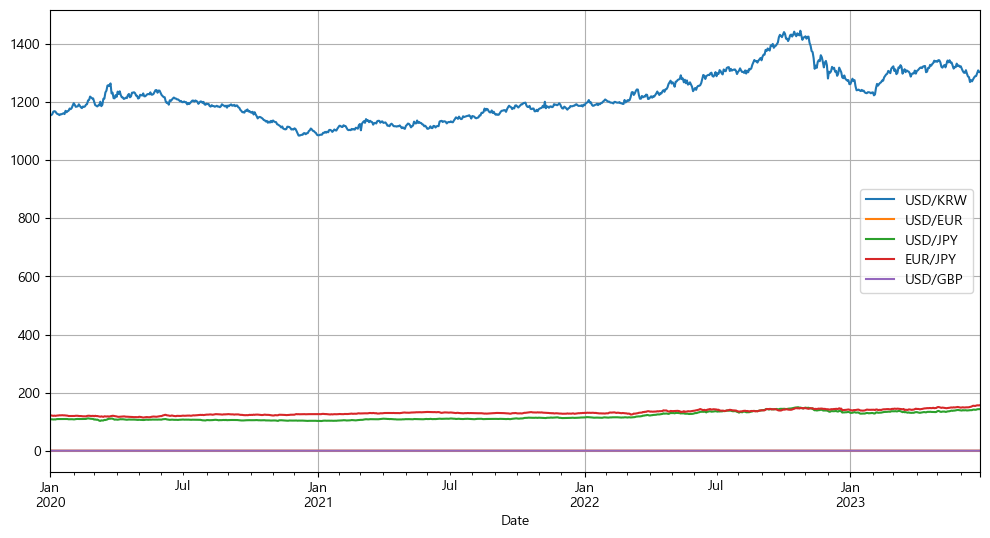

In [40]:
df.plot()

## y 보조축 만들기

In [ ]:
df[['LG화학', '삼성전자']].plot(secondary_y=['LG화학'])

## 비교를 위해 데이터 정규화
- 전체 데이터를 첫번째 row로 나누고 -1.0

In [ ]:
df2 = df[['LG화학', '삼성전자']]

df_plot = df2 / df2.iloc[0] - 1.0
df_plot.plot()

## 여러 종목 정규화 및 비교 차트

<Axes: xlabel='Date'>

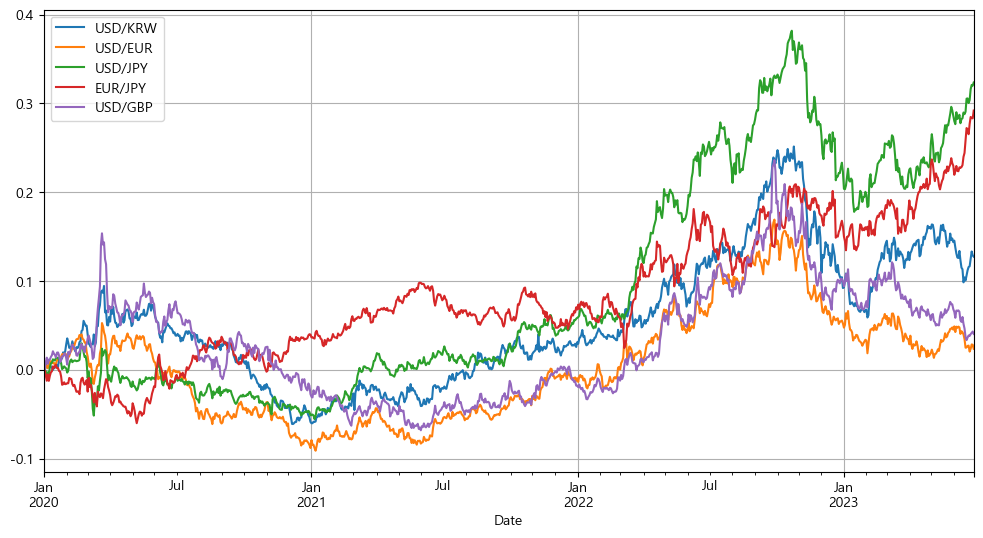

In [41]:
df_norm = df / df.iloc[0] - 1
df_norm.plot()

In [42]:
df_norm.iloc[-1].sort_values(ascending=False)

USD/JPY    0.323571
EUR/JPY    0.292014
USD/KRW    0.127575
USD/GBP    0.040637
USD/EUR    0.023900
Name: 2023-06-28 00:00:00, dtype: float64

## 회귀분석 하기
- 상관관계를 분석해서 업종 지수에 대한 비교 및 특정 종목이 따라가지 못 하는 경우 내.외부 요인 판단 가능

In [67]:
from sklearn.linear_model import LinearRegression #sklearn 싸이킷런에서 회귀모델을 가져오겠다.
import numpy as np

In [104]:
X = df[df.columns[2]] 
y = df[df.columns[-1]]
X,y

(Date
 2020-01-01    108.681000
 2020-01-02    108.712997
 2020-01-03    108.542999
 2020-01-06    107.963997
 2020-01-07    108.405998
                  ...    
 2023-06-22    141.688004
 2023-06-23    143.029999
 2023-06-26    143.541000
 2023-06-27    143.460007
 2023-06-28    143.847000
 Name: USD/JPY, Length: 911, dtype: float64,
 Date
 2020-01-01    0.75400
 2020-01-02    0.75470
 2020-01-03    0.76030
 2020-01-06    0.76452
 2020-01-07    0.75930
                ...   
 2023-06-22    0.78296
 2023-06-23    0.78449
 2023-06-26    0.78557
 2023-06-27    0.78666
 2023-06-28    0.78464
 Name: USD/GBP, Length: 911, dtype: float64)

In [111]:
X,y

(Date
 2020-01-01    108.681000
 2020-01-02    108.712997
 2020-01-03    108.542999
 2020-01-06    107.963997
 2020-01-07    108.405998
                  ...    
 2023-06-22    141.688004
 2023-06-23    143.029999
 2023-06-26    143.541000
 2023-06-27    143.460007
 2023-06-28    143.847000
 Name: USD/JPY, Length: 911, dtype: float64,
 Date
 2020-01-01    0.75400
 2020-01-02    0.75470
 2020-01-03    0.76030
 2020-01-06    0.76452
 2020-01-07    0.75930
                ...   
 2023-06-22    0.78296
 2023-06-23    0.78449
 2023-06-26    0.78557
 2023-06-27    0.78666
 2023-06-28    0.78464
 Name: USD/GBP, Length: 911, dtype: float64)

In [113]:
X = df.iloc[:,np.ravel(2)].values # USD/JPY
y = df.iloc[:,:-1].values # USD/GBP
X,y
# len(X), len(y)

(array([[108.681   ],
        [108.712997],
        [108.542999],
        [107.963997],
        [108.405998],
        [108.015999],
        [109.030998],
        [109.507004],
        [109.566002],
        [109.991997],
        [109.853996],
        [109.883003],
        [110.175003],
        [110.18    ],
        [110.172997],
        [109.907997],
        [109.727997],
        [109.552002],
        [108.802002],
        [108.919998],
        [109.132004],
        [108.987   ],
        [108.876999],
        [108.372002],
        [108.612   ],
        [109.446999],
        [109.814003],
        [109.968002],
        [109.644997],
        [109.765999],
        [109.843002],
        [109.846001],
        [109.758003],
        [109.791   ],
        [109.830002],
        [109.918999],
        [111.209999],
        [111.954002],
        [111.556999],
        [110.857002],
        [110.286003],
        [110.362999],
        [109.660004],
        [107.696999],
        [108.487   ],
        [1

In [114]:
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # fit이 학습모델 -> 학습하면서 모델생성

LinearRegression()

In [115]:
y.shape,X.shape

((911, 4), (911, 1))

In [116]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([[1.16180550e+03, 8.62502463e-01, 1.08681000e+02, 1.26132290e+02],
       [1.16198312e+03, 8.62610300e-01, 1.08712997e+02, 1.26151465e+02],
       [1.16103942e+03, 8.62037371e-01, 1.08542999e+02, 1.26049587e+02],
       ...,
       [1.35532149e+03, 9.79987839e-01, 1.43541000e+02, 1.47023496e+02],
       [1.35487187e+03, 9.79714876e-01, 1.43460007e+02, 1.46974958e+02],
       [1.35702016e+03, 9.81019122e-01, 1.43847000e+02, 1.47206878e+02]])

In [91]:
X.shape, y.shape

((911, 1), (911, 4))

ValueError: x and y must be the same size

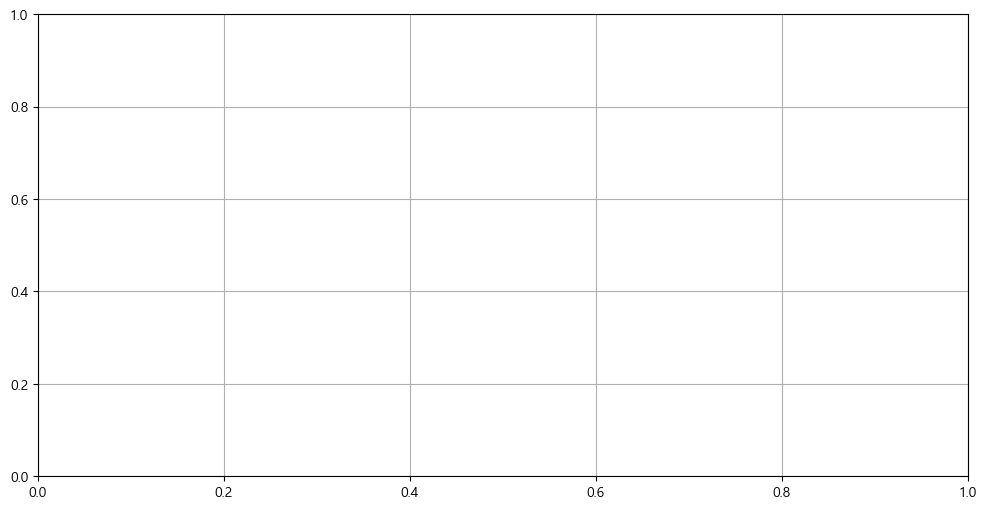

In [117]:
plt.scatter(X,y, color='blue') # 산점도 그래프 (실제 값 그래프)
plt.plot(X, y_pred, color='green')  # 선 그래프 (싸이킷런에서 회귀모델로 학습한 훟 예측한 그래프)
plt.title('하이닉스 BY 삼성전자')
plt.xlabel('삼성전자')
plt.ylabel('SK하이닉스')
plt.show()

In [61]:
print('삼성전자 가격에 따른 SK하이닉스 예상가격 :', reg.predict([[80000]]))
# print('9,8,10시간 공부했을 때 예상 점수 :', reg.predict([[9],[8],[10]]))

ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

In [62]:
reg.coef_, reg.intercept_

(array([[ 5.81071327e+00, -2.76479759e+00,  5.42653632e+02],
        [ 7.72499423e-03, -7.08471228e-03, -4.23270689e-02],
        [ 1.00000000e+00, -1.72726688e-17,  1.32774660e-15],
        [-2.39256766e-17,  1.00000000e+00, -7.68070077e-15]]),
 array([ 4.70712881e+02,  9.48401495e-01, -2.84217094e-14,  5.68434189e-14]))

## 데이터 세트 분리

In [118]:
from sklearn.model_selection import train_test_split  # 데이터 분리는 sklearn.moder_selection 이고 리니어는 sklearn.linear_modeol import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)  # 테스트 사이즈를 8:2로 하겠다 test_size = 0.2 random_state = 0 은 그냥 확인용

In [119]:
len(X_train), len(X_test)

(728, 183)

In [120]:
len(y_train), len(y_test)

(728, 183)

### 분리된 데이터를 통해 모델링

In [121]:
reg = LinearRegression()
reg.fit(X_train, y_train) # 훈련세트로 학습

LinearRegression()

ValueError: x and y must be the same size

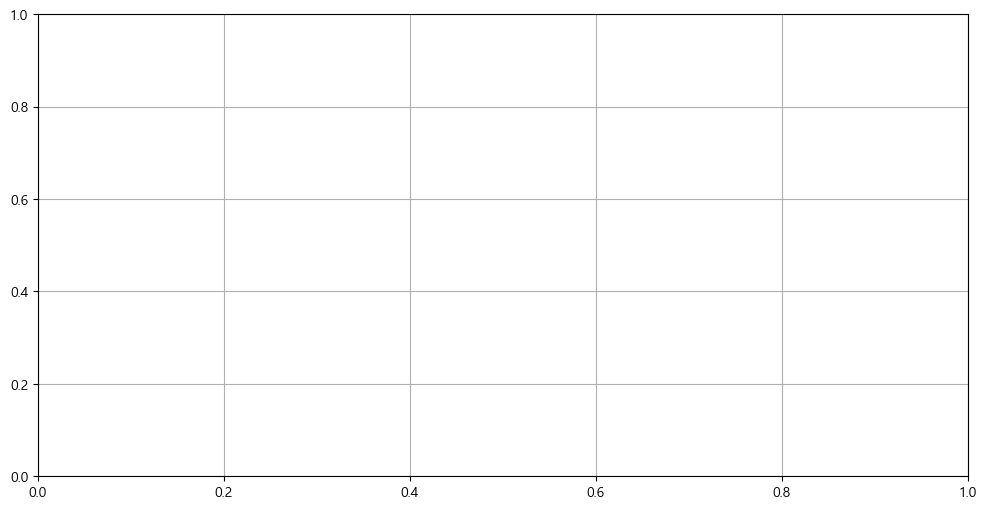

In [122]:
plt.scatter(X_train,y_train, color='blue') # 산점도 그래프 -> 실제 값?
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프  -> 예측 값?
plt.title('하이닉스 BY 삼성전자(train data)')
plt.xlabel('삼성전자')
plt.ylabel('하이닉스')
plt.show()

In [ ]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프 
plt.title('하이닉스 BY 삼성전자(train data)')
plt.xlabel('삼성전자')
plt.ylabel('하이닉스')
plt.show()

In [ ]:
reg.coef_, reg.intercept_

### 모델평가

In [ ]:
reg.score(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

### 경사하강법

In [ ]:
from sklearn.linear_model import SGDRegressor # SGF 확률적 경사하강법 
#지수 표기법
#1e-3 = 0.001 10^-3
#1e-4 = 0.0001 10^-4
#1e+3 = 1000 10^3
#1e+4 = 10000 10^4


# sr = SGDRegressor()
sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1)  #에포크 방식
sr.fit(X_train, y_train)

In [ ]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프 
plt.title('하이닉스 BY 삼성전자(train data)')
plt.xlabel('삼성전자')
plt.ylabel('하이닉스')
plt.show()

In [ ]:
sr.coef_, sr.intercept_

In [ ]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델평가

In [ ]:
sr.score(X_train, y_train) # 룬련 세트를 통한 모델평가